# Data Literacy
#### University of Tübingen, Winter Term 2020/21
## Exercise Sheet 4
&copy; 2020 Prof. Dr. Philipp Hennig & Marius Hobbhahn

This sheet is **due on Tuesday 01 December 2020 at 12noon sharp (i.e. before the start of the lecture).**

---

In this exercise sheet we will explore CO2 emission data in various ways. First, we will visually investigate them through plotting. Then we will answer simple statistical questions about their distribution.

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

# Make inline plots vector graphics
%matplotlib inline
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "svg")

matplotlib.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsfonts} \usepackage{amsmath}"

# Data loading

- download the CO2 data at https://github.com/owid/co2-data which is the accompanying GitHub repository for https://ourworldindata.org/co2-emissions
- import them as a pandas DataFrame
- look at the first 5 rows to double-check everything worked as planned

In [23]:
#Load the data\
co2_data = pd.read_csv("co2.csv")
print(co2_data)

      iso_code      country  year     co2  co2_growth_prct  co2_growth_abs  \
0          AFG  Afghanistan  1949   0.015              NaN             NaN   
1          AFG  Afghanistan  1950   0.084          475.000           0.070   
2          AFG  Afghanistan  1951   0.092            8.696           0.007   
3          AFG  Afghanistan  1952   0.092            0.000           0.000   
4          AFG  Afghanistan  1953   0.106           16.000           0.015   
...        ...          ...   ...     ...              ...             ...   
24011      ZWE     Zimbabwe  2014  11.962            2.838           0.330   
24012      ZWE     Zimbabwe  2015  12.163            1.685           0.202   
24013      ZWE     Zimbabwe  2016  10.807          -11.146          -1.356   
24014      ZWE     Zimbabwe  2017  12.026           11.274           1.218   
24015      ZWE     Zimbabwe  2018  12.263            1.969           0.237   

       consumption_co2  trade_co2  trade_co2_share  co2_per_cap

# Data visualization
to get a handle on the data, we will try several ways to visualize them

## Part I: historical overview of CO2

- Plot the history of CO2 for the entire world (i.e. aggregate, NOT per country). 
- Spot 2 major worlds events in the CO2 data. 
- Your plot has to be self-explainatory and nice: this might include but is not limited to axis-labels, nice colors, a legend, correct plot and label sizes, a title, etc.
- HINT: before you start adding up all countries, check out which kind of countries exist with .unique() and potentially save a lot of time

2 major world event: 
1939-1945 World War II, after the war the co2 emissions started to rise  a lot due to regrowth of economy and factories 
around 2000: when the digitalization hit 

In [19]:
#Data wrangling
total_by_year = (co2_data.groupby("year").sum().reset_index())[['year', 'co2']]
print(total_by_year.head())


Index(['year', 'co2'], dtype='object')
     year         co2
0    1751      46.755
1    1752      46.770
2    1753      46.770
3    1754      46.790
4    1755      46.810
..    ...         ...
263  2014  192191.066
264  2015  192239.366
265  2016  193026.449
266  2017  195418.415
267  2018  198997.041

[268 rows x 2 columns]


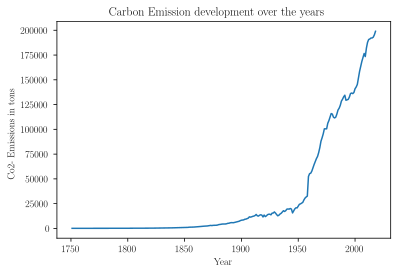

In [22]:
#Data plotting

plt.plot(total_by_year['year'],total_by_year['co2'])
plt.xlabel("Year")
plt.ylabel("Co2- Emissions in tons")
plt.title("Carbon Emission development over the years")
plt.show()
#TODO

## Part II: Absolute CO2 emissions per country for 2018

- Do a Choropleth map of the absolute CO2 estimate for all countries
- HINT: Check out https://plotly.com/python/choropleth-maps/ to get used to choropleth maps
- Check whether the upper end of your color scale corresponds to the country that is the largest emitter. If that is not the case, find the mistake and fix it. 

In [49]:
#Data wrangling for absolute CO2 emissions
total_by_country = (co2_data[co2_data["year"]==2018])[['iso_code', 'country','co2', 'population']]
total_by_country = total_by_country[total_by_country.iso_code.notnull()]
total_by_country = total_by_country[total_by_country["iso_code"] != "OWID_WRL"]
print(total_by_country.sort_values("co2",ascending=False))
#TODO

      iso_code                    country        co2    population
4640       CHN                      China  10064.686  1.427648e+09
22892      USA              United States   5416.278  3.270960e+08
10520      IND                      India   2654.101  1.352642e+09
18013      RUS                     Russia   1710.688  1.457340e+08
11705      JPN                      Japan   1161.981  1.272020e+08
...        ...                        ...        ...           ...
14158      MSR                 Montserrat      0.030  5.000000e+03
23394      WLF  Wallis and Futuna Islands      0.027           NaN
22024      TUV                     Tuvalu      0.012  1.200000e+04
18142      SHN               Saint Helena      0.011  6.000000e+03
15332      NIU                       Niue      0.008  2.000000e+03

[212 rows x 4 columns]


In [48]:
#Data plotting for absolute CO2 emissions
import plotly.express as px

fig = px.choropleth(total_by_country, locations="iso_code",
                    color="co2", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title= "Absolute Co2 Emission per country")
fig.show()

#TODO

## Part III: Relative CO2 emissions per country for 2018

- Proceed similar to the absolute plotting but this time normalized for population, i.e. CO2 emission per capita.
- If the co2_per_capita column isn't of much help, think of other ways to compute this statistic with the existing columns

In [51]:
#Data Wrangling for relative CO2 emissions per country
total_by_country['relative_co2'] = total_by_country.co2 / total_by_country.population
print(total_by_country.head())
#TODO

    iso_code      country      co2  population  relative_co2
69       AFG  Afghanistan    9.439  37172000.0  2.539277e-07
423      ALB      Albania    4.570   2883000.0  1.585154e-06
532      DZA      Algeria  155.725  42228000.0  3.687719e-06
592      AND      Andorra    0.471     77000.0  6.116883e-06
661      AGO       Angola   34.537  30810000.0  1.120967e-06


In [53]:
#Data plotting for relative CO2 emissions per country

fig2 = px.choropleth(total_by_country, locations="iso_code",
                    color="relative_co2", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title= "Realtive Co2 Emission per country")
fig2.show()
#TODO

# Check out some statistics 

There are apparently still people who do not believe CO$_2$ emissions have risen over time (or that that the emissions have an effect, but we will not address this issue here). 
Following the discussion of estimators in the lecture, we will build an estimator for worldwide CO$_2$ emssions in certain time ranges. 

## Are the CO2 emission levels significantly different from previous years?

- re-use the aggregated CO2 data from our first plot
- Split your data in two datasets, one from the first year to 1919 and the second from 1920 to the last possible year.
- Compute the empirical mean and standard deviation for both splits
- Assume the two splits have been drawn from Gaussian distribution. With which probability was the second data range drawn from the same distribution as the first? Plot the two distributions and think about your answer visually. 
- Before you compute the probability think of a significance level that would convince yourself, personally, that they are different distributions. Check if it has been met after your computation.

95% of the distribution befoe 1920 sits between 1 and 2 stand deviations below the mean, what should only account for 20%.  

In [67]:
# Data Wrangling for the splits and Gaussians for 1919
total_by_year_before = total_by_year[total_by_year["year"]<= 1919]
total_by_year_after = total_by_year[total_by_year["year"]> 1919]
#print(total_by_year_after.sort_values("co2", ascending = False))

     year         co2
267  2018  198997.041
266  2017  195418.415
265  2016  193026.449
264  2015  192239.366
263  2014  192191.066
..    ...         ...
169  1920   13444.442
182  1933   13318.789
181  1932   12694.587
171  1922   12665.552
170  1921   11924.383

[99 rows x 2 columns]


84002.2138080808
2481.0917159763308


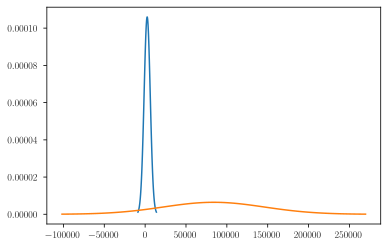

In [64]:
# import stats
import scipy.stats as stats
# Plotting and significance level for the Gaussians for 1919
mean_before = total_by_year_before.co2.mean()
sd_before = total_by_year_before.co2.std()

print(mean_after)
print(mean_before)

mean_after = total_by_year_after.co2.mean()
sd_after = total_by_year_after.co2.std()

x = np.linspace(mean_before - 3*sd_before, mean_before + 3*sd_before, 100)
plt.plot(x, stats.norm.pdf(x, mean_before, sd_before))

x2 = np.linspace(mean_after - 3*sd_after, mean_after + 3*sd_after, 100)
plt.plot(x2, stats.norm.pdf(x2, mean_after, sd_after))


plt.show()




Redo the same analysis but this time let your second range begin at the years 1950 and 2000. Has your previously set confidence level been reached?

In [69]:
# Data Wrangling for the splits and Gaussians for 1950
total_by_year_before = total_by_year[total_by_year["year"]<= 1950]
total_by_year_after = total_by_year[total_by_year["year"]> 1950]
#TODO

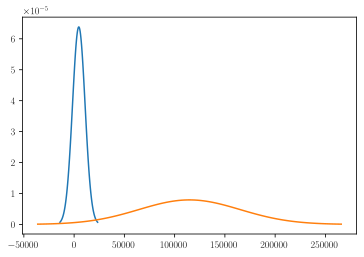

In [70]:
# Plotting and significance level for the Gaussians for 1950

mean_before = total_by_year_before.co2.mean()
sd_before = total_by_year_before.co2.std()


mean_after = total_by_year_after.co2.mean()
sd_after = total_by_year_after.co2.std()

x = np.linspace(mean_before - 3*sd_before, mean_before + 3*sd_before, 100)
plt.plot(x, stats.norm.pdf(x, mean_before, sd_before))

x2 = np.linspace(mean_after - 3*sd_after, mean_after + 3*sd_after, 100)
plt.plot(x2, stats.norm.pdf(x2, mean_after, sd_after))


plt.show()

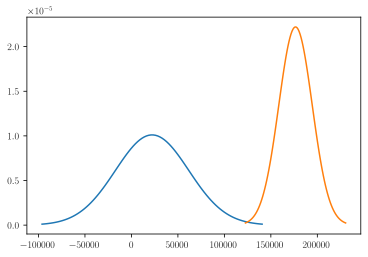

In [71]:
# Data Wrangling for the splits and Gaussians for 2000
total_by_year_before = total_by_year[total_by_year["year"]<= 2000]
total_by_year_after = total_by_year[total_by_year["year"]> 2000]

mean_before = total_by_year_before.co2.mean()
sd_before = total_by_year_before.co2.std()


mean_after = total_by_year_after.co2.mean()
sd_after = total_by_year_after.co2.std()

x = np.linspace(mean_before - 3*sd_before, mean_before + 3*sd_before, 100)
plt.plot(x, stats.norm.pdf(x, mean_before, sd_before))

x2 = np.linspace(mean_after - 3*sd_after, mean_after + 3*sd_after, 100)
plt.plot(x2, stats.norm.pdf(x2, mean_after, sd_after))


plt.show()
#TODO

In [ ]:
# Plotting and significance level for the Gaussians for 1950

#TODO

# Final Words

Do you see a problem with the analysis we just did? In particular, time is a continuous variable, but for this analysis we have treated it as categorical. Do you think this is a problem? Why?

In [ ]:
you can´t use a continous variable (years) as categorical (before, after). Furthermore, computing means and standard deviations does not makes sense, when looking at a development over time (also world events are excluded). 